# Store Sales Prediction

Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot
%matplotlib inline
import seaborn as sns

Importing dataset

In [2]:
df1=pd.read_csv("train.csv")

In [3]:
df1_test=pd.read_csv("test.csv")

Append both the columns

In [4]:
df1=df1.append(df1_test)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5648\3697841793.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1=df1.append(df1_test)


In [5]:
df1.shape

(14204, 12)

Making a copy of the dataset

In [6]:
df=df1.copy()

Looking at first 5 rows of the dataframe

In [7]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


finding the shape of the dataset

In [8]:
df.shape
print("The number of rows in the train dataframe are:",df.shape[0])
print("The number of columns in the train dataframe are:",df.shape[1])

The number of rows in the train dataframe are: 14204
The number of columns in the train dataframe are: 12


Finding data types of various columns

In [9]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

Checking for missing values

In [10]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

We have found that there are missing values in Item_weight and Outlet_Size and there are missing values in Item_Outlet_Sales but that are due to test data

Checking for duplicate data

In [11]:
print(df.duplicated().sum())

0


Information of the dataset

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.4+ MB


Describing the numerical columns of the dataset

In [13]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Handling missing values present in the column Item_Weight

In [14]:
df['Item_Weight'].nunique()

415

In [15]:
df['Item_Weight'].mode()[0]

17.6

In [16]:
df['Item_Weight']=df['Item_Weight'].fillna(df['Item_Weight'].mode()[0])

In [17]:
df['Item_Weight'].isnull().sum()

0

Handling missing values present in the column Outlet_Size

In [18]:
df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [19]:
df['Outlet_Size'].isnull().sum()

4016

In [20]:
df['Outlet_Size'].mode()[0]

'Medium'

In [21]:
df['Outlet_Size']=df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])

In [22]:
df['Outlet_Size'].isnull().sum()

0

Hence we have dealed with the missing values in the dataframe

Data Exploration

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.4+ MB


<Axes: xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

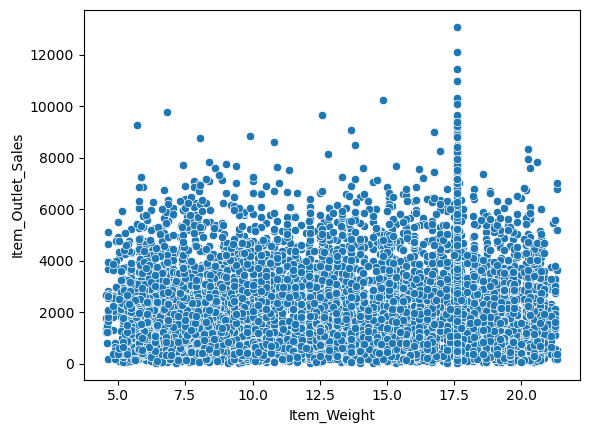

In [24]:
sns.scatterplot(data=df,x='Item_Weight', y='Item_Outlet_Sales')

From the above graph, we observe that even weights of the items increases the sales of the outlet remains constant. Hence we can say that Weight of the item doesnt have a direct relationship with Sales

<Axes: xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

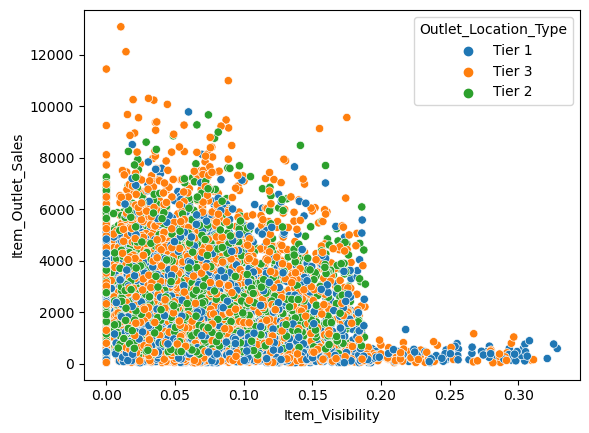

In [25]:
sns.scatterplot(data=df,x='Item_Visibility', y='Item_Outlet_Sales',hue='Outlet_Location_Type')

Observations:
- In tier 1 locations, the items which are more visible are sold less and vice versa
- In tier 2 locations, the items which are more visible arent sold
- In tier 3 locations, the items which are more visible are sold very less and which less visible are sold very more

<Axes: xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

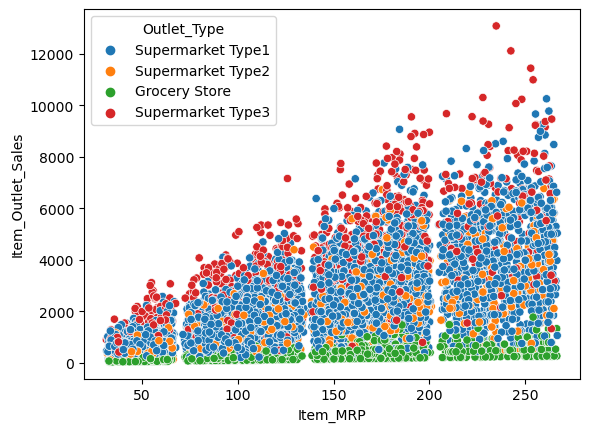

In [26]:
sns.scatterplot(data=df,x='Item_MRP', y='Item_Outlet_Sales',hue='Outlet_Type')

Observations:
1. In Supermarket Type 1, the sales increases as the MRP of the product increases
2. In Supermarket Type 2, the sales increases as the MRP of the product increases but the quantity of products sold in Supermarket Type 2 is less compared to Supermarket 1
3. In Grocery, the sales of the products are very low.
4. In Supermarket Type 3, the sale is maximum compared to others. 

<Axes: xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

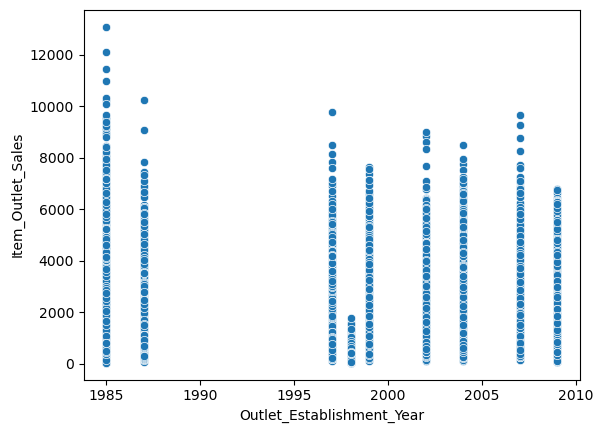

In [27]:
sns.scatterplot(data=df,x='Outlet_Establishment_Year', y='Item_Outlet_Sales')

Observations
- The Outlets established in the year 1985 has the maximum sales while the outlets established in the year 1998 have lower sales
- But we cannot see an effect of establishment year on sales

<Axes: xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

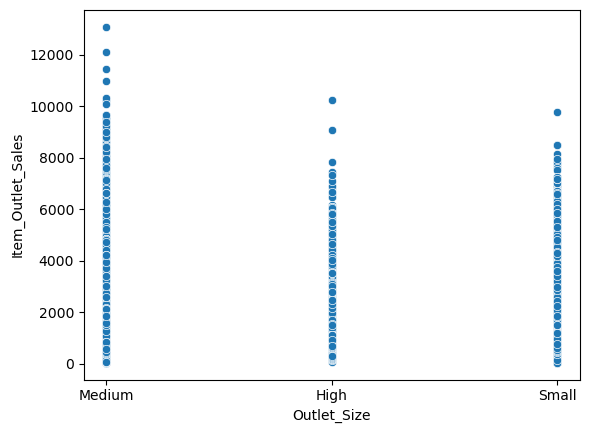

In [28]:
sns.scatterplot(data=df,x='Outlet_Size', y='Item_Outlet_Sales')

Observations
- The Outlets which are Medium in size have maximum sales compared to the small and high sizes.

Converting the data types of the required columns and dealing with categorical columns

Converting the data type of Item_Fat_Content

In [29]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [30]:
values0 = ['Low Fat', 'low fat', 'LF']
        
df['Item_Fat_Content']=['lowfat' if i in values0 else 'regular' for i in df['Item_Fat_Content']]


In [31]:
df['Item_Fat_Content']=df['Item_Fat_Content'].astype('category')

Converting the column Outlet_identifier column to int by removing OUT0

In [32]:
df['Outlet_Identifier'].dtype

dtype('O')

In [33]:
df['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [34]:
df['Outlet_Identifier']=[char.replace("OUT0","") for char in df['Outlet_Identifier']]

In [35]:
df['Outlet_Identifier']=df['Outlet_Identifier'].astype(int)

Converting the category of Outlet_Size

In [36]:
df['Outlet_Size'].dtype

dtype('O')

In [37]:
df['Outlet_Size']=df['Outlet_Size'].astype('category')

In [38]:
df['Outlet_Size'].dtype

CategoricalDtype(categories=['High', 'Medium', 'Small'], ordered=False)

Converting the column Outlet_Location_Type

In [39]:
df['Outlet_Location_Type'].dtype

dtype('O')

In [40]:
df['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [41]:
df['Outlet_Location_Type']=[char.replace("Tier ","") for char in df['Outlet_Location_Type']]

In [42]:
df['Outlet_Location_Type'].unique()

array(['1', '3', '2'], dtype=object)

In [43]:
df['Outlet_Location_Type']=df['Outlet_Location_Type'].astype('int')

In [44]:
df['Outlet_Location_Type'].dtype

dtype('int32')

Converting the column Outlet_Type

In [45]:
df['Outlet_Type'].dtype

dtype('O')

In [46]:
df['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [47]:
df['Outlet_Type']=df['Outlet_Type'].astype('category')

In [48]:
df['Outlet_Type'].dtype

CategoricalDtype(categories=['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
                  'Supermarket Type3'],
, ordered=False)

Now we have converted the columns as per our requirement

Converting Categorical columns into numerical columns

In [49]:
df.dtypes

Item_Identifier                object
Item_Weight                   float64
Item_Fat_Content             category
Item_Visibility               float64
Item_Type                      object
Item_MRP                      float64
Outlet_Identifier               int32
Outlet_Establishment_Year       int64
Outlet_Size                  category
Outlet_Location_Type            int32
Outlet_Type                  category
Item_Outlet_Sales             float64
dtype: object

Nows lets divide the categorical part and numerical part of the Item_Identifier column so as to process the categorical value.

In [50]:
df['x']=[val[0:3] for val in df['Item_Identifier']]

In [51]:
x=df['x'].value_counts().sort_values(ascending=False)

In [52]:
df['x']=df['x'].map(x)

We have done count/frequncy encoding on categorical part of the Varibale Item_Ifentifier. Variable x stores the frequency/count of the eah categorical value.

In [53]:
df['x_1']=[val[3:] for val in df['Item_Identifier']]

Variable 'x_1' stores the numerical part of the Item_Identifier variable

Renaming the abovee columns

In [55]:
df=df.rename(columns={'x':'Item_Identifier_Part1','x_1':'Item_Identifier_Part2'})

In [56]:
df['Item_Identifier_Part2']=df['Item_Identifier_Part2'].astype(int)

Dropping the original variable Item_Identifier

In [57]:
df.drop(['Item_Identifier'],axis=1,inplace=True)

In [58]:
df.head(1)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Identifier_Part1,Item_Identifier_Part2
0,9.3,lowfat,0.016047,Dairy,249.8092,49,1999,Medium,1,Supermarket Type1,3735.138,411,15


Converting the column Item_Fat_Content

In [59]:
df['Item_Fat_Content'].unique()

['lowfat', 'regular']
Categories (2, object): ['lowfat', 'regular']

In [60]:
df['Item_Fat_Content']=pd.get_dummies(df['Item_Fat_Content'],drop_first=True)

Converting the column Item_Type

In [61]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [62]:
# Calculate the frequency/count of each category
encoding = df['Item_Type'].value_counts().to_dict()
# Map the category to its frequency in a new column
df['Item_Type'] = df['Item_Type'].map(encoding)

In [63]:
df['Item_Type']=df['Item_Type'].astype('int')

Converting the column Outlet_Size

In [64]:
df['Outlet_Size'].unique()

['Medium', 'High', 'Small']
Categories (3, object): ['High', 'Medium', 'Small']

In [65]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the categorical column
df['Outlet_Size'] = label_encoder.fit_transform(df['Outlet_Size'])

In [66]:
df['Outlet_Size'].unique()

array([1, 0, 2])

In [67]:
df['Outlet_Size'].dtype

dtype('int32')

Converting the column Outlet_Type

In [68]:
df['Outlet_Type'].unique()

['Supermarket Type1', 'Supermarket Type2', 'Grocery Store', 'Supermarket Type3']
Categories (4, object): ['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3']

In [69]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the categorical column
df['Outlet_Type'] = label_encoder.fit_transform(df['Outlet_Type'])

In [70]:
df['Outlet_Type'].unique()

array([1, 2, 0, 3])

In [71]:
df['Outlet_Type'].dtype

dtype('int32')

In [72]:
correlation=df.corr(method='pearson')
correlation

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Identifier_Part1,Item_Identifier_Part2
Item_Weight,1.000000,-0.027797,0.027043,0.036857,0.030088,-0.061623,-0.274257,0.058158,0.034569,0.162731,0.042074,-0.012696,0.019372
Item_Fat_Content,-0.027797,1.000000,0.044274,0.071976,-0.004019,-0.000936,0.000137,-0.000634,0.001373,-0.000228,0.018719,0.406712,-0.032526
Item_Visibility,0.027043,0.044274,1.000000,0.012394,-0.006351,-0.116631,-0.083678,0.064836,-0.017362,-0.165726,-0.128625,0.059044,-0.028204
Item_Type,0.036857,0.071976,0.012394,1.000000,0.048474,0.000307,0.001426,-0.001499,0.001537,0.001649,0.038123,0.281923,0.037588
Item_MRP,0.030088,-0.004019,-0.006351,0.048474,1.000000,-0.000491,0.000141,-0.001018,0.000838,0.000136,0.567574,0.012587,-0.025212
Outlet_Identifier,-0.061623,-0.000936,-0.116631,0.000307,-0.000491,1.000000,0.141511,0.433135,-0.692131,0.017898,0.152660,-0.001453,0.005015
Outlet_Establishment_Year,-0.274257,0.000137,-0.083678,0.001426,0.000141,0.141511,1.000000,0.193392,-0.089328,-0.122519,-0.049135,-0.001461,0.002852
Outlet_Size,0.058158,-0.000634,0.064836,-0.001499,-0.001018,0.433135,0.193392,1.000000,-0.614300,-0.201505,-0.086182,0.001011,-0.001644
Outlet_Location_Type,0.034569,0.001373,-0.017362,0.001537,0.000838,-0.692131,-0.089328,-0.614300,1.000000,0.467251,0.089367,-0.000926,-0.000348
Outlet_Type,0.162731,-0.000228,-0.165726,0.001649,0.000136,0.017898,-0.122519,-0.201505,0.467251,1.000000,0.401522,-0.001841,0.006126


<Axes: >

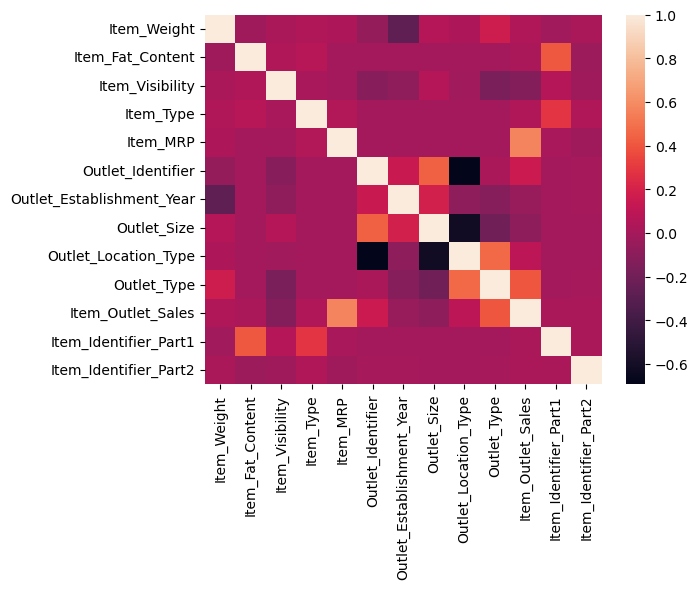

In [73]:
sns.heatmap(correlation)

Frm the correlation above we have found that, Item_MRP is  the most correlated feature with the output variable and Outlet_Identifier and Outlet_Location_Type are the most negatively correlated features

Checking the distribution of the graph, if skewed converting it to normal or guassian distribution

In [74]:
df.skew()

Item_Weight                 -0.261745
Item_Fat_Content             0.613645
Item_Visibility              1.195175
Item_Type                   -0.194145
Item_MRP                     0.130728
Outlet_Identifier            0.194559
Outlet_Establishment_Year   -0.396465
Outlet_Size                 -0.087077
Outlet_Location_Type        -0.209053
Outlet_Type                  0.927344
Item_Outlet_Sales            1.177531
Item_Identifier_Part1       -0.713931
Item_Identifier_Part2        0.004161
dtype: float64

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

def density_plot(df,column_name):
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column_name], kde=True, color='blue')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('Histogram with Density Plot')

In [76]:
df['Item_Visibility']=df1['Item_Visibility']

<function matplotlib.pyplot.show(close=None, block=None)>

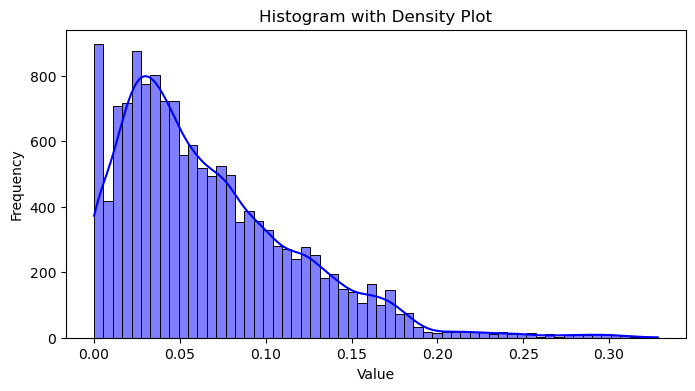

In [77]:
density_plot(df,'Item_Visibility')
plt.show

In [78]:
df['Item_Visibility'] = np.sqrt(df['Item_Visibility'])

<function matplotlib.pyplot.show(close=None, block=None)>

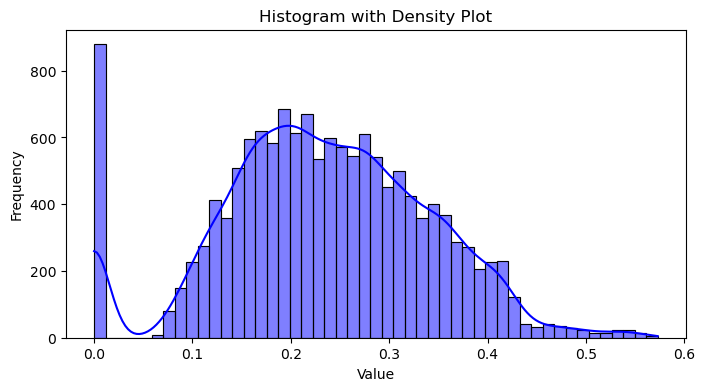

In [79]:
density_plot(df,'Item_Visibility')
plt.show

In [80]:
df['Item_Visibility']=df['Item_Visibility'].astype(float)

In [81]:
df['Item_Visibility'].dtype

dtype('float64')

In [82]:
df['Item_Visibility']=[0.25 if val==0 else val for val in df['Item_Visibility']]

# Model Training

In [83]:
df.dtypes

Item_Weight                  float64
Item_Fat_Content               uint8
Item_Visibility              float64
Item_Type                      int32
Item_MRP                     float64
Outlet_Identifier              int32
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
Item_Outlet_Sales            float64
Item_Identifier_Part1          int64
Item_Identifier_Part2          int32
dtype: object

In [84]:
df.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Identifier_Part1,Item_Identifier_Part2
count,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,8523.000000,14204.000000,14204.000000
mean,13.618300,0.353351,0.248927,1294.377077,141.004977,29.109476,1997.830681,1.170867,2.112856,1.201281,2181.288914,315.303295,30.425655
std,4.606037,0.478027,0.088635,559.049423,62.086938,13.927056,8.371664,0.600306,0.812755,0.796543,1706.499616,140.476327,17.272863
min,4.555000,0.000000,0.059789,89.000000,31.290000,10.000000,1985.000000,0.000000,1.000000,0.000000,33.290000,9.000000,1.000000
25%,9.300000,0.000000,0.182053,858.000000,94.012000,17.000000,1987.000000,1.000000,1.000000,1.000000,834.247400,135.000000,15.000000
50%,14.500000,0.000000,0.249694,1136.000000,142.247000,27.000000,1999.000000,1.000000,2.000000,1.000000,1794.331000,361.000000,30.000000
75%,17.600000,1.000000,0.306655,1989.000000,185.855600,45.000000,2004.000000,2.000000,3.000000,1.000000,3101.296400,441.000000,45.000000
max,21.350000,1.000000,0.573054,2013.000000,266.888400,49.000000,2009.000000,2.000000,3.000000,3.000000,13086.964800,467.000000,60.000000


In [85]:
list(df.columns)

['Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Outlet_Sales',
 'Item_Identifier_Part1',
 'Item_Identifier_Part2']

In [86]:
df_test=df[df['Item_Outlet_Sales'].isnull()]

In [87]:
df_train=df[~df['Item_Outlet_Sales'].isnull()]

In [88]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [89]:
X = df_train.drop(columns=['Item_Outlet_Sales'],axis=1)

In [90]:
y = df_train['Item_Outlet_Sales']

In [91]:
X

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Identifier_Part1,Item_Identifier_Part2
0,9.300,0,0.126678,1136,249.8092,49,1999,1,1,1,411,15
1,5.920,1,0.138846,726,48.2692,18,2009,1,3,2,73,1
2,17.500,0,0.129461,736,141.6180,49,1999,1,1,1,342,15
3,19.200,1,0.250000,2013,182.0950,10,1998,1,3,0,460,7
4,8.930,0,0.250000,1548,53.8614,13,1987,0,3,1,89,19
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.238293,1989,214.5218,13,1987,0,3,1,334,22
8519,8.380,1,0.216754,1086,108.1570,45,2002,1,2,1,446,36
8520,10.600,0,0.187580,858,85.1224,35,2004,2,2,1,101,29
8521,7.210,1,0.381078,1989,103.1332,18,2009,1,3,2,342,46


In [92]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [94]:
from sklearn.preprocessing import StandardScaler

In [95]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [96]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [97]:
regressor=LinearRegression()
regressor.fit(X_train_scaled,Y_train)
Y_pred=regressor.predict(X_test_scaled)
r2=r2_score(Y_test,Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared (R2) Score: {r2}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 1357895.3952492948
Root Mean Squared Error: 1165.2876877618226
R-squared (R2) Score: 0.5155090840566512
Mean Absolute Error: 872.1649134714415


In [98]:
rf_regressor = RandomForestRegressor(n_estimators=250, random_state=42,criterion='squared_error')
rf_regressor.fit(X_train_scaled, Y_train)
Y_pred = rf_regressor.predict(X_test_scaled)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2=r2_score(Y_test,Y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error: 1240325.4367331676
Root Mean Squared Error: 1113.6989883865242
R-squared (R2) Score: 0.5574575118134465


In [99]:
k = 5
knn_regressor = KNeighborsRegressor(n_neighbors=k)
knn_regressor.fit(X_train_scaled, Y_train)
Y_pred = knn_regressor.predict(X_test_scaled)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2=r2_score(Y_test,Y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared (R2) Score: {r2}")


Mean Squared Error: 1426526.6698268636
Root Mean Squared Error: 1194.3729190779836
R-squared (R2) Score: 0.4910217566831453


In [100]:
# Gradient Boosting Regression
gradient_boosting_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gradient_boosting_regressor.fit(X_train_scaled, Y_train)

# AdaBoost Regression
adaboost_regressor = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3), n_estimators=100, learning_rate=0.1, random_state=42)
adaboost_regressor.fit(X_train_scaled, Y_train)

# Make predictions
Y_pred_gb = gradient_boosting_regressor.predict(X_test_scaled)
Y_pred_ab = adaboost_regressor.predict(X_test_scaled)

# Evaluate the models
mse_gb = mean_squared_error(Y_test, Y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(Y_test, Y_pred_gb)

mse_ab = mean_squared_error(Y_test, Y_pred_ab)
rmse_ab = np.sqrt(mse_ab)
r2_ab = r2_score(Y_test, Y_pred_ab)

print("Gradient Boosting Regression:")
print(f"Mean Squared Error (MSE): {mse_gb}")
print(f"Root Mean Squared Error: {rmse_gb}")
print(f"R-squared (R2) Score: {r2_gb}")

print("\nAdaBoost Regression:")
print(f"Mean Squared Error (MSE): {mse_ab}")
print(f"Root Mean Squared Error: {rmse_ab}")
print(f"R-squared (R2) Score: {r2_ab}")

C:\Program Files\anaconda\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Gradient Boosting Regression:
Mean Squared Error (MSE): 1116470.3049792575
Root Mean Squared Error: 1056.6315843184216
R-squared (R2) Score: 0.601648460864216

AdaBoost Regression:
Mean Squared Error (MSE): 1256443.3929015053
Root Mean Squared Error: 1120.911857775403
R-squared (R2) Score: 0.5517066981834327


In [101]:
svm_regressor = SVR(kernel='linear', C=1.0)
svm_regressor.fit(X_train_scaled, Y_train)
Y_pred = svm_regressor.predict(X_test_scaled)

mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2=r2_score(Y_test,Y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error: 1477812.5544649987
Root Mean Squared Error: 1215.6531390429586
R-squared (R2) Score: 0.4727231857400328


Hence, we are done with Model training part. With our best model to be 'GradientBoostingRegressor' with and R2 score of 0.601648460864216